# OLS Ordinary Least Squares

The OLS general model $\hat{y}$ is defined by: 

$$ \hat{y} = \theta_0+\theta_1 x_1 $$

Applying the partial derivatives with rescpect $\theta_0$ and equaliting to zero:

$$\frac{\partial SSR}{\partial \theta_0}=0 $$

here SSR is defined as:

$$ \sum_{i=1}^n (y^i - \hat{y}^i)^2 $$

Resulting in:

$$ \theta_0 = \frac{\sum_{i=1}^n y^i}{n} - \frac{\theta_1 \sum_{i=1}^n x^i}{n}$$

or 

$$ \theta_0 = \bar{y} -\theta_1 \bar{x} $$

In a similar way, the partial derivative of SSR with respect of $\theta_1$ will result in: 

$$\theta_1 = \frac{\sum_{i=1}^n x^i(y^i-\bar{y}) }{\sum_{i=1}^n x^i(x^i-\bar{x})}$$

# Implementing OLS in Python

In [1]:
import numpy as np
x = np.linspace(0,4,20)
theta0 = 3.9654
theta1 = 2.5456
y = theta0+theta1*x
y

array([ 3.9654    ,  4.50131579,  5.03723158,  5.57314737,  6.10906316,
        6.64497895,  7.18089474,  7.71681053,  8.25272632,  8.78864211,
        9.32455789,  9.86047368, 10.39638947, 10.93230526, 11.46822105,
       12.00413684, 12.54005263, 13.07596842, 13.61188421, 14.1478    ])

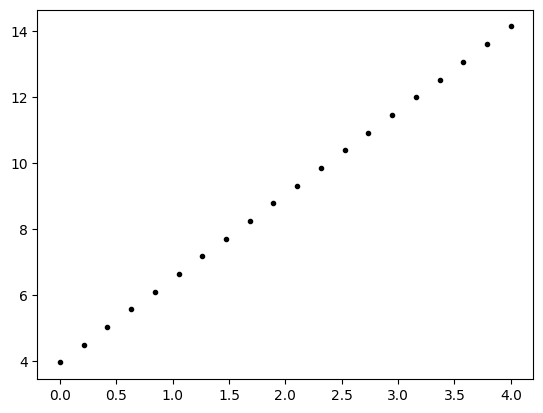

In [2]:
import matplotlib.pyplot as plt 
plt.plot(x,y, '.k')
plt.show()

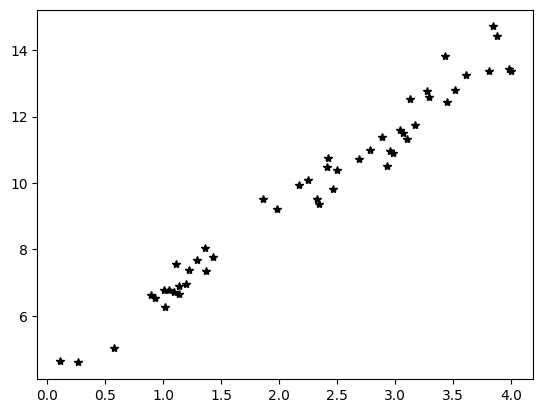

In [3]:
x = 4*np.random.rand(50, 1)
y = theta0 + theta1*x+0.5*np.random.randn(50, 1)
plt.plot(x,y, '*k')
plt.show()

## Implementing with `for` 
$$\theta_1 = \frac{\sum_{i=1}^n x^i(y^i-\bar{y}) }{\sum_{i=1}^n x^i(x^i-\bar{x})}$$

In [4]:
# for implementation for computing theta1:
xAve = x.mean()
yAve = y.mean()
num = 0
den = 0
for i in range(len(x)):
    num = num + x[i]*(y[i]-yAve)
    den = den + x[i]*(x[i]-xAve)
theta1Hat = num/den
print(theta1Hat)

[2.4717291]


In [5]:
# for implementation for theta0:
# $$ \theta_0 = \bar{y} -\theta_1 \bar{x} $$
theta0Hat = yAve - theta1Hat*xAve
print(theta0Hat)
#real values are
#theta0 = 3.9654
#theta1 = 2.5456

[4.18459936]


In [6]:
total = 0
for i in range(len(x)):
    total = total + x[i]
total/len(x)

array([2.27654582])

## Implementing OLS by numpy methods

In [7]:
# For theta1:
# $$\theta_1 = \frac{\sum_{i=1}^n x^i(y^i-\bar{y}) }{\sum_{i=1}^n x^i(x^i-\bar{x})}$$
num2 = np.sum(x*(y-y.mean()))
den2 = np.sum(x*(x-x.mean()))
theta1Hat2 = num2/den2
print(theta1Hat2)

# Efficacy --> time


2.4717291029649546


In [8]:
theta0Hat2 = yAve-theta1Hat2*xAve
theta0Hat2

4.184599360470533

# Comparing Model and Data

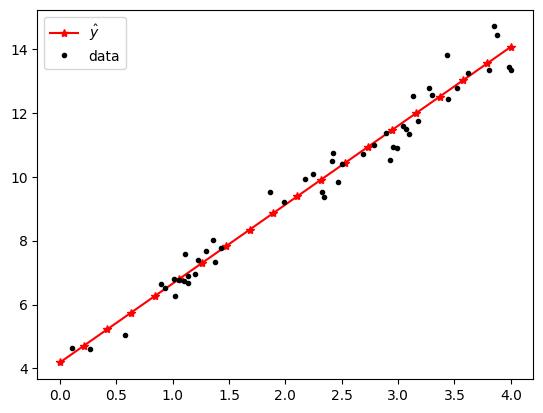

In [9]:
xNew = np.linspace(0,4,20)
yHat = theta0Hat + theta1Hat*xNew
plt.plot(xNew, yHat, '-*r', label="$\hat{y}$")
plt.plot(x,y,'.k', label="data")
plt.legend()
plt.show()

# Functions for data and OLS

In [22]:
def DataGen(xn: float,n: int, disp,theta0=3.9654,theta1=2.5456):
    x = xn*np.random.rand(n, 1)
    #theta0 = 3.9654
    #theta1 = 2.5456
    y = theta0+theta1*x+disp*np.random.randn(n,1)
    return x,y

In [33]:
x,y = DataGen(9, 100, 1, 0,1)

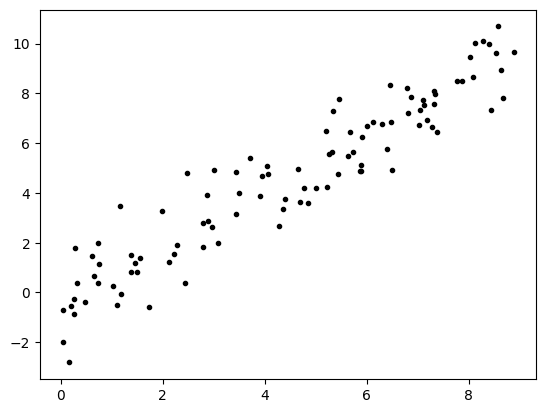

In [34]:
plt.plot(x,y,'.k')
plt.show()

In [35]:
def MyOLS(x,y):
    # for implementation for computing theta1:
    xAve = x.mean()
    yAve = y.mean()
    num = 0
    den = 0
    for i in range(len(x)):
        num = num + x[i]*(y[i]-yAve)
        den = den + x[i]*(x[i]-xAve)
    theta1Hat = num/den
    theta0Hat = yAve - theta1Hat*xAve
    return theta0Hat, theta1Hat

In [38]:
the0, the1 = MyOLS(x,y)
the1

array([1.12539439])

# TODO - Students
- [ ] Efficacy --> time: For method Vs. Numpy